# Baseline
This notebook explores running images through the model and getting a base accuracy.

In [38]:
from keras import applications
from keras.applications.vgg19 import preprocess_input, decode_predictions
from keras.preprocessing.image import img_to_array, load_img
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from IPython.display import SVG
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow, savefig
import numpy as np
import os
import pydot

In [2]:
# config
# inline matplotlib graphs
%matplotlib inline

# to use GPU
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [3]:
# variables
input_channels = 3
# The default h x w of VGG19 is 224x224
input_height, input_width = 224, 224

# data
data_input_dir = 'images/input/spongebob.jpg'

# output
output_diagram_dir = 'diagram/baseline.png'

## Load VGG19

In [4]:
# load the VGG19 network with it's pretrained weights
# we need to specify the shape of our inputs
model = applications.VGG19(weights='imagenet',
                           include_top=True,
                           input_shape=(input_width, input_height, input_channels))

In [5]:
# examine the loaded model
# we should see that the loaded model has the FC layers + softmax removed
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

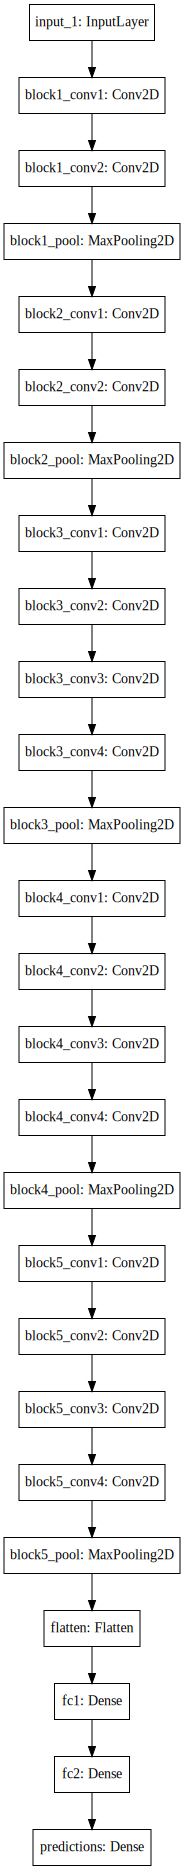

In [6]:
# draw a diagram of the model and save it disk
plot_model(model, to_file=output_diagram_dir)
SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Prepare the data

In [11]:
# load the image
input_pil = load_img(data_input_dir, interpolation='nearest', target_size=(input_height, input_width))
input = img_to_array(input_pil)

In [12]:
# batch the image
input_batch = np.expand_dims(input, axis=0)

# preprocess the image for the model
preprocessed_input_batch = preprocess_input(input_batch)

## Make predictions with the model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


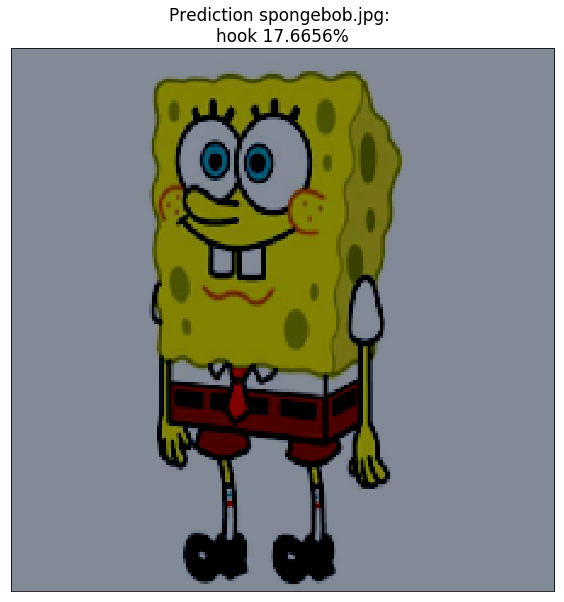

In [39]:
prediction = model.predict(preprocessed_input_batch)

# decode the prediction
decoded_prediction = decode_predictions(prediction, top=10)

# view the image
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')

# construct a title
className = decoded_prediction[0][0][1]
confidence = round(decoded_prediction[0][0][2] * 100, 4)

predictionText = "Prediction spongebob.jpg: \n" + className + " " + str(confidence) + "%"
    
ax = fig.add_subplot(1, 1, 1)
ax.imshow(input/255)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(predictionText, fontdict={ 'fontsize': 17})

savefig('images/predictions/baseline.jpg')